# Matrix Factorization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import svd_tests as t
import pickle

## 1. SVD
`1.` Run the cell below to create the **user_movie_subset** dataframe.  This will be the dataframe you will be using for the first part of this notebook.

In [3]:
movies = pd.read_csv('movies_clean.csv')
reviews = pd.read_csv('reviews_clean.csv')

del movies['Unnamed: 0']
del reviews['Unnamed: 0']

# Create user-by-item matrix
user_items = reviews[['user_id', 'movie_id', 'rating']]
user_by_movie = user_items.groupby(['user_id', 'movie_id'])['rating'].max().unstack()

user_movie_subset = user_by_movie[[75314,  68646, 99685]].dropna(axis=0)
print(user_movie_subset)

movie_id  75314  68646  99685
user_id                      
2213        7.0   10.0    8.0
2223        6.0   10.0    7.0
2942        8.0    9.0    8.0
3298        8.0   10.0   10.0
3424        9.0    9.0    9.0
5205        8.0    9.0    9.0


`2.` Now that you have the **user_movie_subset** matrix, use this matrix to correctly match each key to the correct value in the dictionary below.  Use the cells below the dictionary as necessary.

In [4]:
# match each letter to the best statement in the dictionary below - each will be used at most once
a = 6
b = 99685
c = 'The Godfather'
d = 'Goodfellas'
e = 3298
f = 30685
g = 3

sol_1_dict = {
    'the number of users in the user_movie_subset': a,
    'the number of movies in the user_movie_subset': g,
    'the user_id with the highest average ratings given': e,
    'the movie_id with the highest average ratings received': b,
    'the name of the movie that received the highest average rating': d
}

#test dictionary here
t.test1(sol_1_dict)

That's right!  There are 6 users in the dataset, which is given by the number of rows. There are 3 movies in the dataset given by the number of columns.  You can find the movies or users with the highest average ratings by taking the mean of each row or column.  Using the movies table, you can find the movie names associated with each id.  This shows the top rated movie is Goodfellas!


In [5]:
# user with the highest average rating
print(user_movie_subset.mean(axis=1))

# movie with highest average rating
print(user_movie_subset.mean(axis=0))

# list of movie names
for movie_id in [73486, 75314,  68646, 99685]:
    print(movies[movies['movie_id'] == movie_id]['movie'])

# users by movies
user_movie_subset.shape

user_id
2213    8.333333
2223    7.666667
2942    8.333333
3298    9.333333
3424    9.000000
5205    8.666667
dtype: float64
movie_id
75314    7.666667
68646    9.500000
99685    8.500000
dtype: float64
4505    One Flew Over the Cuckoo's Nest (1975)
Name: movie, dtype: object
4692    Taxi Driver (1976)
Name: movie, dtype: object
3988    The Godfather (1972)
Name: movie, dtype: object
7404    Goodfellas (1990)
Name: movie, dtype: object


(6, 3)

Now that you have a little more context about the matrix we will be performing Singular Value Decomposition on, we're going to do just that.  To get started, let's remind ourselves about the dimensions of each of the matrices we are going to get back.   Essentially, we are going to split the **user_movie_subset** matrix into three matrices:
$$ U \Sigma V^T $$

`3.` Given what you learned about in the previous parts of this lesson, provide the dimensions for each of the matrices specified above using the dictionary below.

In [6]:
# match each letter in the dictionary below - a letter may appear more than once.
a = 'a number that you can choose as the number of latent features to keep'
b = 'the number of users'
c = 'the number of movies'
d = 'the sum of the number of users and movies'
e = 'the product of the number of users and movies'

sol_2_dict = {
    'the number of rows in the U matrix': b,
    'the number of columns in the U matrix': a,
    'the number of rows in the V transpose matrix': a,
    'the number of columns in the V transpose matrix': c
}

#test dictionary here
t.test2(sol_2_dict)

That's right!  We will now put this to use, so you can see how the dot product of these matrices come together to create our user item matrix.  The number of latent features will control the sigma matrix as well, and this will a square matrix that will at most be the minimum of the number of users and number of movies (in our case the minimum is the 4 movies).


Now let's verify the above dimensions by performing SVD on our user-movie matrix.

`4.` Below you can find the code used to perform SVD in numpy. What do you notice about the shapes of your matrices?  If you try to take the dot product of the three objects you get back, can you directly do this to get back the user-movie matrix?

In [7]:
u, s, vt = np.linalg.svd(user_movie_subset)
s.shape, u.shape, vt.shape

((3,), (6, 6), (3, 3))

In [8]:
# Run this cell for our thoughts on the questions posted above
t.question4thoughts()

Looking at the dimensions of the three returned objects, we can see the following:

 1. The u matrix is a square matrix with the number of rows and columns equaling the number of users. 

 2. The v transpose matrix is also a square matrix with the number of rows and columns equaling the number of items.

 3. The sigma matrix is actually returned as just an array with 4 values.  

 In order to set up the matrices in a way that they can be multiplied together, we have a few steps to perform: 

 1. Turn sigma into a square matrix with the number of latent features we would like to keep. 

 2. Change the columns of u and the rows of v transpose to match this number of dimensions. 

 If we would like to exactly re-create the user-movie matrix, we could choose to keep all of the latent features.


`5.` Use the thoughts from the above question to create **u**, **s**, and **vt** with four latent features.  When you have all three matrices created correctly, run the test below to show that the dot product of the three matrices creates the original user-movie matrix.  The matrices should have the following dimensions:
$$ U_{n x k} $$
$$\Sigma_{k x k} $$
$$V^T_{k x m} $$

where:
1. n is the number of users
2. k is the number of latent features to keep (4 for this case)
3. m is the number of movies

In [9]:
# Change the dimensions of u, s, and vt as necessary to use three latent features
# update the shape of u and store in u_new
u_new = u[:, :len(s)]

# update the shape of s and store in s_new
s_new = np.zeros((len(s), len(s)))
s_new[:len(s), :len(s)] = np.diag(s)

# Because we are using 3 latent features and there are only 3 movies,
# vt and vt_new are the same
vt_new = vt

In [10]:
assert u_new.shape == (6, 3), "Oops!  The shape of the u matrix doesn't look right. It should be 6 by 3."
assert s_new.shape == (3, 3), "Oops!  The shape of the sigma matrix doesn't look right.  It should be 3 x 3."
assert vt_new.shape == (3, 3), "Oops! The shape of the v transpose matrix doesn't look right.  It should be 3 x 3."
assert np.allclose(np.dot(np.dot(u_new, s_new), vt_new), user_movie_subset), "Oops!  Something went wrong with the dot product.  Your result didn't reproduce the original movie_user matrix."
print("That's right! The dimensions of u should be 6 x 3, and both v transpose and sigma should be 3 x 3.  The dot product of the three matrices how equals the original user-movie matrix!")

That's right! The dimensions of u should be 6 x 3, and both v transpose and sigma should be 3 x 3.  The dot product of the three matrices how equals the original user-movie matrix!


It turns out that the sigma matrix can actually tell us how much of the original variability in the user-movie matrix is captured by each latent feature.  The total amount of variability to be explained is the sum of the squared diagonal elements.  The amount of variability explained by the first componenet is the square of the first value in the diagonal.  The amount of variability explained by the second componenet is the square of the second value in the diagonal.

`6.` Using the above information, can you determine the amount of variability in the original user-movie matrix that can be explained by only using the first two components? Use the cell below for your work, and then test your answer against the solution with the following cell.

In [11]:
total_var = np.sum(s**2)
var_exp_comp1_and_comp2 = s[0]**2 + s[1]**2
perc_exp = round(var_exp_comp1_and_comp2/total_var*100, 2)
print("The total variance in the original matrix is {}.".format(total_var))
print("Ther percentage of variability captured by the first two components is {}%.".format(perc_exp))

The total variance in the original matrix is 1340.0000000000005.
Ther percentage of variability captured by the first two components is 99.91%.


In [12]:
assert np.round(perc_exp, 2) == 99.91, "Oops!  That doesn't look quite right.  You should have total variability as the sum of all the squared elements in the sigma matrix.  Then just the sum of the squared first two elements is the amount explained by the first two latent features.  Try again."
print("Yup!  That all looks good!")

Yup!  That all looks good!


`7.` Similar to in the previous question, change the shapes of your u, sigma, and v transpose matrices.  However, this time consider only using the first 2 components to reproduce the user-movie matrix instead of all 3. After you have your matrices set up, check your matrices against the solution by running the tests.  The matrices should have the following dimensions:
$$ U_{n x k} $$
$$\Sigma_{k x k} $$
$$V^T_{k x m} $$

where:
1. n is the number of users
2. k is the number of latent features to keep (2 for this case)
3. m is the number of movies

In [14]:
# Change the dimensions of u, s, and vt as necessary to use four latent features
# update the shape of u and store in u_new
k = 2
u_2 = u[:, :k]

# update the shape of s and store in s_new
s_2 = np.zeros((k, k))
s_2[:k, :k] = np.diag(s[:k])

# Because we are using 2 latent features, we need to update vt this time
vt_2 = vt[:k, :]

In [15]:
assert u_2.shape == (6, 2), "Oops!  The shape of the u matrix doesn't look right. It should be 6 by 2."
assert s_2.shape == (2, 2), "Oops!  The shape of the sigma matrix doesn't look right.  It should be 2 x 2."
assert vt_2.shape == (2, 3), "Oops! The shape of the v transpose matrix doesn't look right.  It should be 2 x 3."
print("That's right! The dimensions of u should be 6 x 2, sigma should be 2 x 2, and v transpose should be 2 x 3. \n\n The question is now that we don't have all of the latent features, how well can we really re-create the original user-movie matrix?")

That's right! The dimensions of u should be 6 x 2, sigma should be 2 x 2, and v transpose should be 2 x 3. 

 The question is now that we don't have all of the latent features, how well can we really re-create the original user-movie matrix?


`8.` When using all 4 latent features, we saw that we could exactly reproduce the user-movie matrix.  Now that we only have 2 latent features, we might measure how well we are able to reproduce the original matrix by looking at the sum of squared errors from each rating produced by taking the dot product as compared to the actual rating.  Find the sum of squared error based on only the two latent features, and use the following cell to test against the solution.

In [16]:
# Compute the dot product
pred_ratings = np.dot(np.dot(u_2, s_2), vt_2)

# Compute the squared error for each predicted vs. actual rating
sum_square_errs = np.sum(np.sum((user_movie_subset - pred_ratings)**2))

In [17]:
assert np.round(sum_square_errs, 2)==1.2, "Oops!  That doesn't look quite right.  You should return a single number for the whole matrix."
print("That looks right!  Nice job!")

That looks right!  Nice job!


At this point, you may be thinking... why would we want to choose a k that doesn't just give us back the full user-movie matrix with all the original ratings.  This is a good question.  One reason might be for computational reasons - sure, you may want to reduce the dimensionality of the data you are keeping, but really this isn't the main reason we would want to perform reduce k to lesser than the minimum of the number of movies or users.

Let's take a step back for a second.  In this example we just went through, your matrix was very clean.  That is, for every user-movie combination, we had a rating.  **There were no missing values.** But what we know from the previous lesson is that the user-movie matrix is full of missing values.

A matrix similar to the one we just performed SVD on:

<img src="images/nice_ex.png" width="400" height="400">

The real world:

<img src="images/real_ex.png" width="400" height="400">

Therefore, if we keep all k latent features it is likely that latent features with smaller values in the sigma matrix will explain variability that is probably due to noise and not signal. Furthermore, if we use these "noisey" latent features to assist in re-constructing the original user-movie matrix it will potentially (and likely) lead to worse ratings than if we only have latent features associated with signal.

`9.` Let's try introducing just a little of the real world into this example by performing SVD on a matrix with missing values.  Below I have added a new user to our matrix who hasn't rated all four of our movies.  Try performing SVD on the new matrix.  What happens?

In [18]:
user_movie_subset

movie_id,75314,68646,99685
user_id,,,
2213,7.0,10.0,8.0
2223,6.0,10.0,7.0
2942,8.0,9.0,8.0
3298,8.0,10.0,10.0
3424,9.0,9.0,9.0
5205,8.0,9.0,9.0


In [20]:
# This line adds one nan value as the very first entry in our matrix
user_movie_subset.iloc[0, 0] = np.nan

# Try svd with this new matrix (sẽ có error)
# u, s, vt = np.linalg.svd(user_movie_subset)

**Even with just one nan value we cannot perform SVD!  This is going to be a huge problem, because our real dataset has nan values everywhere!  This is where FunkSVD comes in to help.**

## 2. Funk SVD

In [21]:
movies = pd.read_csv('movies_clean.csv')
reviews = pd.read_csv('reviews_clean.csv')

del movies['Unnamed: 0']
del reviews['Unnamed: 0']

# Create user-by-item matrix
user_items = reviews[['user_id', 'movie_id', 'rating', 'timestamp']]
user_by_movie = user_items.groupby(['user_id', 'movie_id'])['rating'].max().unstack()

# Create data subset
user_movie_subset = user_by_movie[[75314,  68646, 99685]].dropna(axis=0)
ratings_mat = np.matrix(user_movie_subset)
print(ratings_mat)

[[ 7. 10.  8.]
 [ 6. 10.  7.]
 [ 8.  9.  8.]
 [ 8. 10. 10.]
 [ 9.  9.  9.]
 [ 8.  9.  9.]]


`1.` You will use the **user_movie_subset** matrix to show that your FunkSVD algorithm will converge.  In the below cell, use the comments and document string to assist you as you complete writing your own function to complete FunkSVD.  You may also want to try to complete the funtion on your own without the assistance of comments.  You may feel free to remove and add to the function in any way that gets you a working solution!

**Notice:** There isn't a sigma matrix in this version of matrix factorization.

In [22]:
def FunkSVD(ratings_mat, latent_features=4, learning_rate=0.0001, iters=100):
    '''
    This function performs matrix factorization using a basic form of FunkSVD with no regularization

    INPUT:
    ratings_mat - (numpy array) a matrix with users as rows, movies as columns, and ratings as values
    latent_features - (int) the number of latent features used
    learning_rate - (float) the learning rate
    iters - (int) the number of iterations

    OUTPUT:
    user_mat - (numpy array) a user by latent feature matrix
    movie_mat - (numpy array) a latent feature by movie matrix
    '''

    # Set up useful values to be used through the rest of the function
    n_users = ratings_mat.shape[0]
    n_movies = ratings_mat.shape[1]
    num_ratings = np.count_nonzero(~np.isnan(ratings_mat))

    # initialize the user and movie matrices with random values
    user_mat = np.random.rand(n_users, latent_features)
    movie_mat = np.random.rand(latent_features, n_movies)

    # initialize sse at 0 for first iteration
    sse_accum = 0

    # keep track of iteration and MSE
    print("Optimizaiton Statistics")
    print("Iterations | Mean Squared Error ")

    # for each iteration
    for iteration in range(iters):

        # update our sse
        old_sse = sse_accum
        sse_accum = 0

        # For each user-movie pair
        for i in range(n_users):
            for j in range(n_movies):

                # if the rating exists
                if ratings_mat[i, j] > 0:

                    # compute the error as the actual minus the dot product of the user and movie latent features
                    diff = ratings_mat[i, j] - np.dot(user_mat[i, :], movie_mat[:, j])

                    # Keep track of the sum of squared errors for the matrix
                    sse_accum += diff**2

                    # update the values in each matrix in the direction of the gradient
                    for k in range(latent_features):
                        user_mat[i, k] += learning_rate * (2*diff*movie_mat[k, j])
                        movie_mat[k, j] += learning_rate * (2*diff*user_mat[i, k])

        # print results
        print("%d \t\t %f" % (iteration+1, sse_accum / num_ratings))

    return user_mat, movie_mat

`2.` Try out your function on the **user_movie_subset** dataset.  First try 3 latent features, a learning rate of 0.005, and 10 iterations.  When you take the dot product of the resulting U and V matrices, how does the resulting **user_movie** matrix compare to the original subset of the data?

In [23]:
user_mat, movie_mat = FunkSVD(ratings_mat,
                              latent_features=3,
                              learning_rate=0.005,
                              iters=10)

Optimizaiton Statistics
Iterations | Mean Squared Error 
1 		 54.780732
2 		 40.616300
3 		 24.455977
4 		 11.369786
5 		 4.232252
6 		 1.545599
7 		 0.780148
8 		 0.593327
9 		 0.548940
10 		 0.537259


In [24]:
print(np.dot(user_mat, movie_mat))
print(ratings_mat)

[[ 7.58221568  9.29536187  8.46213049]
 [ 7.04384836  8.53561009  7.75044412]
 [ 7.49361747  9.10678585  8.22927521]
 [ 8.44925413 10.21818046  9.32529649]
 [ 7.88036094  9.62919306  8.84325923]
 [ 7.82668533  9.56378863  8.59331159]]
[[ 7. 10.  8.]
 [ 6. 10.  7.]
 [ 8.  9.  8.]
 [ 8. 10. 10.]
 [ 9.  9.  9.]
 [ 8.  9.  9.]]


**The predicted ratings from the dot product are already starting to look a lot like the original data values even after only 10 iterations. Clearly the model is not done learning, but things are looking good.**

`3.` Let's try out the function again on the **user_movie_subset** dataset.  This time we will again use 3 latent features and a learning rate of 0.005.  However, let's bump up the number of iterations to 300.  When you take the dot product of the resulting U and V matrices, how does the resulting **user_movie** matrix compare to the original subset of the data?  What do you notice about the `mean squared error` at the end of each training iteration?

In [25]:
user_mat, movie_mat = FunkSVD(ratings_mat,
                              latent_features=3,
                              learning_rate=0.005,
                              iters=300)

Optimizaiton Statistics
Iterations | Mean Squared Error 
1 		 60.122337
2 		 47.705232
3 		 31.844701
4 		 16.744412
5 		 6.886349
6 		 2.510693
7 		 1.084370
8 		 0.689807
9 		 0.579252
10 		 0.542675
11 		 0.527611
12 		 0.520143
13 		 0.515806
14 		 0.512846
15 		 0.510485
16 		 0.508362
17 		 0.506307
18 		 0.504240
19 		 0.502123
20 		 0.499937
21 		 0.497673
22 		 0.495326
23 		 0.492891
24 		 0.490364
25 		 0.487742
26 		 0.485020
27 		 0.482195
28 		 0.479263
29 		 0.476220
30 		 0.473061
31 		 0.469783
32 		 0.466381
33 		 0.462852
34 		 0.459191
35 		 0.455395
36 		 0.451461
37 		 0.447385
38 		 0.443164
39 		 0.438795
40 		 0.434277
41 		 0.429606
42 		 0.424783
43 		 0.419804
44 		 0.414671
45 		 0.409383
46 		 0.403940
47 		 0.398344
48 		 0.392596
49 		 0.386700
50 		 0.380659
51 		 0.374476
52 		 0.368157
53 		 0.361708
54 		 0.355134
55 		 0.348444
56 		 0.341646
57 		 0.334748
58 		 0.327761
59 		 0.320695
60 		 0.313562
61 		 0.306373
62 		 0.299141
63 		 0.291880
64 

In [26]:
print(np.dot(user_mat, movie_mat))
print(ratings_mat)

[[ 7.05323613 10.01901687  7.94525523]
 [ 5.97528703  9.99023234  7.0254881 ]
 [ 7.69835121  8.89408838  8.30797513]
 [ 8.14905576 10.05539565  9.84945279]
 [ 9.01804256  9.00524937  8.98370651]
 [ 8.05545529  9.02048822  8.94352406]]
[[ 7. 10.  8.]
 [ 6. 10.  7.]
 [ 8.  9.  8.]
 [ 8. 10. 10.]
 [ 9.  9.  9.]
 [ 8.  9.  9.]]


**In this case, we were able to completely reconstruct the item-movie matrix to closer to 0 mean squared error at the end of 300 th iterations.**

The last time we placed an **np.nan** value into this matrix the entire svd algorithm in python broke.  Let's see if that is still the case using your FunkSVD function.  In the below cell, I have placed a nan into the first cell of your numpy array.

`4.` Use 3 latent features, a learning rate of 0.005, and 450 iterations.  Are you able to run your SVD without it breaking (something that was not true about the python built in)?  Do you get a prediction for the nan value?  What is your prediction for the missing value? Use the cells below to answer these questions.

In [32]:
ratings_mat[0, 0] = np.nan
ratings_mat

matrix([[nan, 10.,  8.],
        [ 6., 10.,  7.],
        [ 8.,  9.,  8.],
        [ 8., 10., 10.],
        [ 9.,  9.,  9.],
        [ 8.,  9.,  9.]])

In [33]:
# run SVD on the matrix with the missing value
user_mat, movie_mat = FunkSVD(ratings_mat,
                              latent_features=3,
                              learning_rate=0.005,
                              iters=450)

Optimizaiton Statistics
Iterations | Mean Squared Error 
1 		 62.912090
2 		 51.183513
3 		 35.946836
4 		 20.447408
5 		 9.188936
6 		 3.483287
7 		 1.359016
8 		 0.713689
9 		 0.532938
10 		 0.480196
11 		 0.462039
12 		 0.453863
13 		 0.448943
14 		 0.445239
15 		 0.442035
16 		 0.439040
17 		 0.436118
18 		 0.433199
19 		 0.430245
20 		 0.427234
21 		 0.424150
22 		 0.420984
23 		 0.417729
24 		 0.414380
25 		 0.410931
26 		 0.407379
27 		 0.403721
28 		 0.399954
29 		 0.396073
30 		 0.392078
31 		 0.387965
32 		 0.383732
33 		 0.379377
34 		 0.374899
35 		 0.370295
36 		 0.365566
37 		 0.360709
38 		 0.355724
39 		 0.350611
40 		 0.345371
41 		 0.340003
42 		 0.334510
43 		 0.328892
44 		 0.323151
45 		 0.317290
46 		 0.311313
47 		 0.305222
48 		 0.299022
49 		 0.292717
50 		 0.286314
51 		 0.279818
52 		 0.273235
53 		 0.266573
54 		 0.259840
55 		 0.253043
56 		 0.246192
57 		 0.239296
58 		 0.232364
59 		 0.225407
60 		 0.218436
61 		 0.211461
62 		 0.204493
63 		 0.197544
64 

In [34]:
preds = np.dot(user_mat, movie_mat)
print("The predicted value for the missing rating is: {}".format(preds[0,0]))
print()
print("That's right! You just predicted a rating for a user-movie pair that was never rated!")
print("But if you look in the original matrix, this was actually a value of 7. Not bad!")

The predicted value for the missing rating is: 7.262131632815076

That's right! You just predicted a rating for a user-movie pair that was never rated!
But if you look in the original matrix, this was actually a value of 7. Not bad!


Now let's extend this to a more realistic example. Unfortunately, running this function on your entire user-movie matrix is still not something you likely want to do on your local machine.  However, we can see how well this example extends to 1000 users.  In the above portion, you were using a very small subset of data with no missing values.

`5.` Given the size of this matrix, this will take quite a bit of time.  Consider the following hyperparameters: 3 latent features, 0.005 learning rate, and 500 iterations.  Grab a snack, take a walk, and this should be done running in a bit.

In [36]:
# Setting up a matrix of the first 1000 users with movie ratings
first_1000_users = np.matrix(user_by_movie.head(1000))

# perform funkSVD on the matrix of the top 1000 users
user_mat, movie_mat = FunkSVD(first_1000_users,
                              latent_features=3,
                              learning_rate=0.005,
                              iters=10) # iters=500

Optimizaiton Statistics
Iterations | Mean Squared Error 
1 		 23.043350
2 		 10.757469
3 		 7.391635
4 		 5.717883
5 		 4.701460
6 		 4.009878
7 		 3.504012
8 		 3.115574
9 		 2.806692
10 		 2.554387


`6.` Now that you have a set of predictions for each user-movie pair.  Let's answer a few questions about your results. Provide the correct values to each of the variables below, and check your solutions using the tests below.

In [37]:
# How many actual ratings exist in first_1000_users
num_ratings = np.count_nonzero(~np.isnan(first_1000_users))
print("The number of actual ratings in the first_1000_users is {}.".format(num_ratings))
print()

# How many ratings did we make for user-movie pairs that didn't have ratings
ratings_for_missing = first_1000_users.shape[0]*first_1000_users.shape[1] - num_ratings
print("The number of ratings made for user-movie pairs that didn't have ratings is {}".format(ratings_for_missing))

The number of actual ratings in the first_1000_users is 14287.

The number of ratings made for user-movie pairs that didn't have ratings is 13835713


In [38]:
assert num_ratings == 14287, "Oops!  The number of actual ratings doesn't quite look right."
assert ratings_for_missing == 13835713, "Oops!  The number of movie-user pairs that you made ratings for that didn't actually have ratings doesn't look right."

# Make sure you made predictions on all the missing user-movie pairs
preds = np.dot(user_mat, movie_mat)
assert np.isnan(preds).sum() == 0
print("Nice job!  Looks like you have predictions made for all the missing user-movie pairs! But I still have one question... How good are they?")

Nice job!  Looks like you have predictions made for all the missing user-movie pairs! But I still have one question... How good are they?


# 3. How Are We Doing?

In [39]:
movies = pd.read_csv('movies_clean.csv')
reviews = pd.read_csv('reviews_clean.csv')

del movies['Unnamed: 0']
del reviews['Unnamed: 0']

1. Using the **reviews** dataframe, perform the following tasks to create a training and validation set of data we can use to test the performance of your SVD algorithm using **off-line** validation techniques.
 * Order the reviews dataframe from earliest to most recent
 * Pull the first 10000 reviews from  the dataset
 * Make the first 8000/10000 reviews the training data
 * Make the last 2000/10000 the test data
 * Return the training and test datasets

In [40]:
def create_train_test(reviews, order_by, training_size, testing_size):
    '''
    INPUT:
    reviews - (pandas df) dataframe to split into train and test
    order_by - (string) column name to sort by
    training_size - (int) number of rows in training set
    testing_size - (int) number of columns in the test set

    OUTPUT:
    training_df -  (pandas df) dataframe of the training set
    validation_df - (pandas df) dataframe of the test set
    '''
    reviews_new = reviews.sort_values(order_by)
    training_df = reviews_new.head(training_size)
    validation_df = reviews_new.iloc[training_size:training_size+testing_size]

    return training_df, validation_df

In [41]:
# Use our function to create training and test datasets
train_df, val_df = create_train_test(reviews, 'date', 8000, 2000)

In [42]:
assert train_df.shape[0] == 8000, "The number of rows doesn't look right in the training dataset."
assert val_df.shape[0] == 2000, "The number of rows doesn't look right in the validation dataset"
assert str(train_df.tail(1)['date']).split()[1] == '2013-07-19', "The last date in the training dataset doesn't look like what we expected."
assert str(val_df.tail(1)['date']).split()[1] == '2013-08-18', "The last date in the validation dataset doesn't look like what we expected."
print("Nice job!  Looks like you have written a function that provides training and validation dataframes for you to use in the next steps.")

Nice job!  Looks like you have written a function that provides training and validation dataframes for you to use in the next steps.


In the real world, we might have all of the data up to this final date in the training data.  Then we want to see how well we are doing for each of the new ratings, which show up in the test data.

Below is a working example of the function created in the previous example you can use (or you can replace with your own).

`2.`  Fit the function to the training data with the following hyperparameters: 15 latent features, a learning rate of 0.005, and 300 iterations. This will take some time to run, so you may choose fewer latent features, a higher learning rate, or fewer iteratios if you want to speed up the process.

**Note:** Again, this might be a good time to take a phone call, go for a walk, or just take a little break.

In [43]:
def FunkSVD(ratings_mat, latent_features=12, learning_rate=0.0001, iters=100):
    '''
    This function performs matrix factorization using a basic form of FunkSVD with no regularization

    INPUT:
    ratings_mat - (numpy array) a matrix with users as rows, movies as columns, and ratings as values
    latent_features - (int) the number of latent features used
    learning_rate - (float) the learning rate
    iters - (int) the number of iterations

    OUTPUT:
    user_mat - (numpy array) a user by latent feature matrix
    movie_mat - (numpy array) a latent feature by movie matrix
    '''

    # Set up useful values to be used through the rest of the function
    n_users = ratings_mat.shape[0]
    n_movies = ratings_mat.shape[1]
    num_ratings = np.count_nonzero(~np.isnan(ratings_mat))

    # initialize the user and movie matrices with random values
    user_mat = np.random.rand(n_users, latent_features)
    movie_mat = np.random.rand(latent_features, n_movies)

    # initialize sse at 0 for first iteration
    sse_accum = 0

    # keep track of iteration and MSE
    print("Optimizaiton Statistics")
    print("Iterations | Mean Squared Error ")

    # for each iteration
    for iteration in range(iters):

        # update our sse
        old_sse = sse_accum
        sse_accum = 0

        # For each user-movie pair
        for i in range(n_users):
            for j in range(n_movies):

                # if the rating exists
                if ratings_mat[i, j] > 0:

                    # compute the error as the actual minus the dot product of the user and movie latent features
                    diff = ratings_mat[i, j] - np.dot(user_mat[i, :], movie_mat[:, j])

                    # Keep track of the sum of squared errors for the matrix
                    sse_accum += diff**2

                    # update the values in each matrix in the direction of the gradient
                    for k in range(latent_features):
                        user_mat[i, k] += learning_rate * (2*diff*movie_mat[k, j])
                        movie_mat[k, j] += learning_rate * (2*diff*user_mat[i, k])

        # print results
        print("%d \t\t %f" % (iteration+1, sse_accum / num_ratings))

    return user_mat, movie_mat

In [44]:
# Create user-by-item matrix - nothing to do here
train_user_item = train_df[['user_id', 'movie_id', 'rating', 'timestamp']]
train_data_df = train_user_item.groupby(['user_id', 'movie_id'])['rating'].max().unstack()
train_data_np = np.array(train_data_df)

# Fit FunkSVD with the specified hyper parameters to the training data
user_mat, movie_mat = FunkSVD(train_data_np,
                              latent_features=15,
                              learning_rate=0.005,
                              iters=10) # iters=300

Optimizaiton Statistics
Iterations | Mean Squared Error 
1 		 9.471600
2 		 5.080275
3 		 3.723673
4 		 2.925616
5 		 2.378400
6 		 1.974197
7 		 1.662162
8 		 1.414140
9 		 1.212905
10 		 1.047187


Now that you have created the **user_mat** and **movie_mat**, we can use this to make predictions for how users would rate movies, by just computing the dot product of the row associated with a user and the column associated with the movie.

`3.` Use the comments in the function below to complete the **predict_rating** function.

In [45]:
def predict_rating(user_matrix, movie_matrix, user_id, movie_id):
    '''
    INPUT:
    user_matrix - user by latent factor matrix
    movie_matrix - latent factor by movie matrix
    user_id - the user_id from the reviews df
    movie_id - the movie_id according the movies df

    OUTPUT:
    pred - the predicted rating for user_id-movie_id according to FunkSVD
    '''
    # Create series of users and movies in the right order
    user_ids_series = np.array(train_data_df.index)
    movie_ids_series = np.array(train_data_df.columns)

    # User row and Movie Column
    user_row = np.where(user_ids_series == user_id)[0][0]
    movie_col = np.where(movie_ids_series == movie_id)[0][0]

    # Take dot product of that row and column in U and V to make prediction
    pred = np.dot(user_matrix[user_row, :], movie_matrix[:, movie_col])

    return pred

In [46]:
# Test your function with the first user-movie in the user-movie matrix (notice this is a nan)
pred_val = predict_rating(user_mat, movie_mat, 2625, 169547)
pred_val

8.006049632006786

It is great that you now have a way to make predictions. However it might be nice to get a little phrase back about the user, movie, and rating.

`4.` Use the comments in the function below to complete the **predict_rating** function.

**Note:** The movie name doesn't come back in a great format, so you can see in the solution I messed around with it a bit just to make it a little nicer.

In [47]:
def print_prediction_summary(user_id, movie_id, prediction):
    '''
    INPUT:
    user_id - the user_id from the reviews df
    movie_id - the movie_id according the movies df
    prediction - the predicted rating for user_id-movie_id
    '''
    movie_name = str(movies[movies['movie_id'] == movie_id]['movie']) [5:]
    movie_name = movie_name.replace('\nName: movie, dtype: object', '')
    print("For user {} we predict a {} rating for the movie {}.".format(user_id, round(prediction, 2), str(movie_name)))

In [48]:
# Test your function the the results of the previous function
print_prediction_summary(2625, 169547, pred_val)

For user 2625 we predict a 8.01 rating for the movie     American Beauty (1999).


Now that we have the ability to make predictions, let's see how well our predictions do on the test ratings we already have.  This will give an indication of how well have captured the latent features, and our ability to use the latent features to make predictions in the future!

`5.` For each of the user-movie rating in the **val_df** dataset, compare the actual rating given to the prediction you would make.  How do your predictions do?  Do you run into any problems?  If yes, what is the problem?  Use the document strings and comments below to assist as you work through these questions.

In [49]:
def validation_comparison(val_df, num_preds):
    '''
    INPUT:
    val_df - the validation dataset created in the third cell above
    num_preds - (int) the number of rows (going in order) you would like to make predictions for

    OUTPUT:
    Nothing returned - print a statement about the prediciton made for each row of val_df from row 0 to num_preds
    '''
    val_users = np.array(val_df['user_id'])
    val_movies = np.array(val_df['movie_id'])
    val_ratings = np.array(val_df['rating'])


    for idx in range(num_preds):
        try:
            pred = predict_rating(user_mat, movie_mat, val_users[idx], val_movies[idx])
            print("The actual rating for user {} on movie {} is {}.\n While the predicted rating is {}."
                  .format(val_users[idx], val_movies[idx], val_ratings[idx], round(pred)))
        except IndexError:
            continue


# Perform the predicted vs. actual for the first 10 rows.  How does it look?
validation_comparison(val_df, 10)

The actual rating for user 6410 on movie 1245492 is 8.
 While the predicted rating is 7.
The actual rating for user 2894 on movie 1602613 is 3.
 While the predicted rating is 5.
The actual rating for user 2625 on movie 169547 is 10.
 While the predicted rating is 8.
The actual rating for user 5490 on movie 770828 is 6.
 While the predicted rating is 7.


# 4. Cold Start Problem
In cases where you are introduced to a new user or new movie, collaborative flitering is not helpful as a technique to make predictions.

Instead, you will need to use one of the techniques from the previous lesson like content based recommendations for new items or rank based recommendations for new users.

As a final step to completing out our recommendation system, we will build in these edge cases. Run the cell below to get started.

### Matrix Factorization - Collaborative Filtering Where Possible
Notice the following information is available by running the below cell:

`1.` **reviews** - a dataframe of reviews

`2.` **movies** - a dataframe of movies

`3.` **create_train_test** - a function for creating the training and validation datasets

`4.` **predict_rating** - a function that takes a user and movie and gives a prediction using FunkSVD

`5.` **train_df** and **val_df** - the training and test datasets used in the previous notebook

`6.` **user_mat** and **movie_mat** - the u and v matrices from FunkSVD

`7.` **train_data_df** - a user-movie matrix with ratings where available.  FunkSVD was performed on this matrix

In [2]:
movies = pd.read_csv('movies_clean.csv')
reviews = pd.read_csv('reviews_clean.csv')

del movies['Unnamed: 0']
del reviews['Unnamed: 0']

In [3]:
def create_train_test(reviews, order_by, training_size, testing_size):
    '''
    INPUT:
    reviews - (pandas df) dataframe to split into train and test
    order_by - (string) column name to sort by
    training_size - (int) number of rows in training set
    testing_size - (int) number of columns in the test set

    OUTPUT:
    training_df -  (pandas df) dataframe of the training set
    validation_df - (pandas df) dataframe of the test set
    '''
    reviews_new = reviews.sort_values(order_by)
    training_df = reviews_new.head(training_size)
    validation_df = reviews_new.iloc[training_size:training_size+testing_size]

    return training_df, validation_df

def predict_rating(user_matrix, movie_matrix, user_id, movie_id):
    '''
    INPUT:
    user_matrix - user by latent factor matrix
    movie_matrix - latent factor by movie matrix
    user_id - the user_id from the reviews df
    movie_id - the movie_id according the movies df

    OUTPUT:
    pred - the predicted rating for user_id-movie_id according to FunkSVD
    '''
    # Create series of users and movies in the right order
    user_ids_series = np.array(train_data_df.index)
    movie_ids_series = np.array(train_data_df.columns)

    # User row and Movie Column
    user_row = np.where(user_ids_series == user_id)[0][0]
    movie_col = np.where(movie_ids_series == movie_id)[0][0]

    # Take dot product of that row and column in U and V to make prediction
    pred = np.dot(user_matrix[user_row, :], movie_matrix[:, movie_col])

    return pred

# Use our function to create training and test datasets
train_df, val_df = create_train_test(reviews, 'date', 8000, 2000)

# Create user-by-item matrix - this will keep track of order of users and movies in u and v
train_user_item = train_df[['user_id', 'movie_id', 'rating', 'timestamp']]
train_data_df = train_user_item.groupby(['user_id', 'movie_id'])['rating'].max().unstack()
train_data_np = np.array(train_data_df)

# Read in user and movie matrices
user_file = open("user_matrix", 'rb')
user_mat = pickle.load(user_file)
user_file.close()

movie_file = open("movie_matrix", 'rb')
movie_mat = pickle.load(movie_file)
movie_file.close()

### Validating Predictions

Unfortunately, you weren't able to make predictions on every user-movie combination in the test set, as some of these users or movies were new.

However, you can validate your predictions for the user-movie pairs that do exist in the user_mat and movie_mat matrices.

`1.` Complete the function below to see how far off we were on average across all of the predicted ratings.

In [4]:
def validation_comparison(val_df, user_mat=user_mat, movie_mat=movie_mat):
    '''
    INPUT:
    val_df - the validation dataset created in the third cell above
    user_mat - U matrix in FunkSVD
    movie_mat - V matrix in FunkSVD

    OUTPUT:
    rmse - RMSE of how far off each value is from it's predicted value
    perc_rated - percent of predictions out of all possible that could be rated
    actual_v_pred - a 10 x 10 grid with counts for actual vs predicted values
    '''

    val_users = np.array(val_df['user_id'])
    val_movies = np.array(val_df['movie_id'])
    val_ratings = np.array(val_df['rating'])

    sse = 0
    num_rated = 0
    preds, acts = [], []
    actual_v_pred = np.zeros((10,10))
    for idx in range(len(val_users)):
        try:
            pred = predict_rating(user_mat, movie_mat, val_users[idx], val_movies[idx])
            sse += (val_ratings[idx] - pred)**2
            num_rated+=1
            preds.append(pred)
            acts.append(val_ratings[idx])
            actual_v_pred[11-int(val_ratings[idx]-1), int(round(pred)-1)]+=1

        except:
            continue

    rmse = np.sqrt(sse/num_rated)
    perc_rated = num_rated/len(val_users)
    return rmse, perc_rated, actual_v_pred, preds, acts

2.909000348736573 0.5065


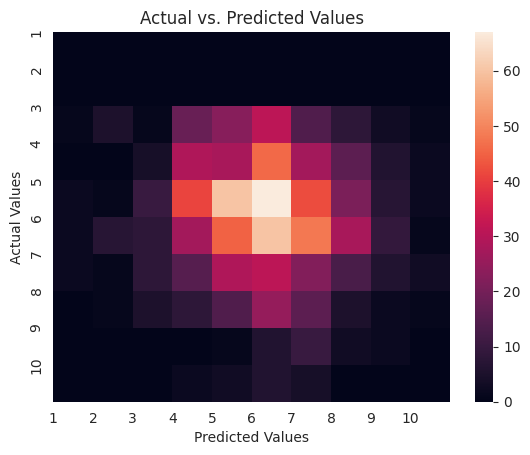

In [5]:
# How well did we do?
rmse, perc_rated, actual_v_pred, preds, acts = validation_comparison(val_df)
print(rmse, perc_rated)
sns.heatmap(actual_v_pred);
plt.xticks(np.arange(10), np.arange(1,11));
plt.yticks(np.arange(10), np.arange(1,11));
plt.xlabel("Predicted Values");
plt.ylabel("Actual Values");
plt.title("Actual vs. Predicted Values");

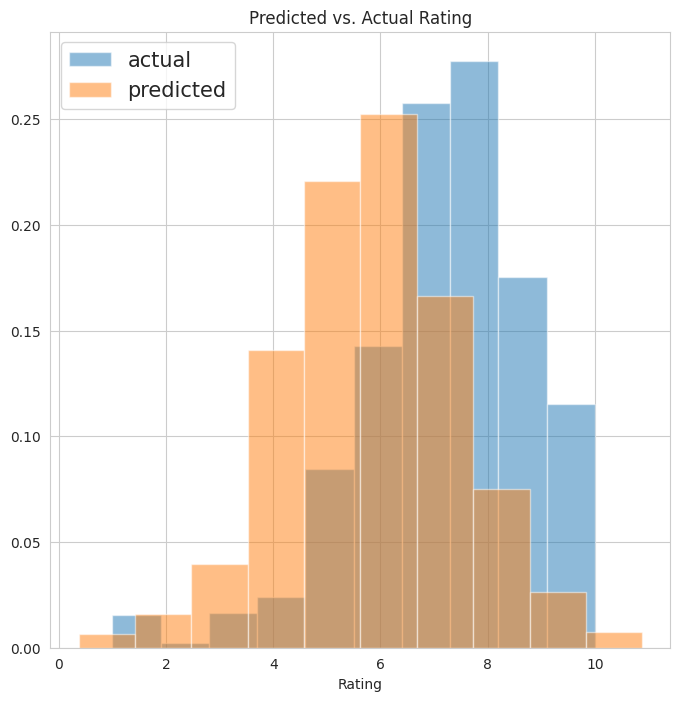

In [6]:
plt.figure(figsize=(8,8))
plt.hist(acts, density=True, alpha=.5, label='actual');
plt.hist(preds, density=True, alpha=.5, label='predicted');
plt.legend(loc=2, prop={'size': 15});
plt.xlabel('Rating');
plt.title('Predicted vs. Actual Rating');

`2.` How many user-movie pairs were we unable to make predictions for?  Use the cell below to answer this question.

In [59]:
# From the above, this can be calculated as follows:
not_rated = int(len(val_df['rating'])*(1-perc_rated))
rated = int(len(val_df['rating'])*perc_rated)

print("Number not rated {}".format(not_rated))
print("Number rated {}.".format(rated))

Number not rated 987
Number rated 1012.


### Content Based For New Movies
If all of the above went well, you will notice we still have work to do!  We need to bring in a few things we picked up from the last lesson to use for those new users and movies.  Below is the code used to make the content based recommendations, which found movies that were similar to one another.  This was from **5_Content_Based_Recommendations** in the previous lesson.

The below function **find_similar_movies** will provide similar movies to any movie based only on content.

Run the cell below to gain access to the content based similarity functions.

In [7]:
# Subset so movie_content is only using the dummy variables for each genre and the 3 century based year dummy columns
movie_content = np.array(movies.iloc[:,4:])

# Take the dot product to obtain a movie x movie matrix of similarities
dot_prod_movies = movie_content.dot(np.transpose(movie_content))


def find_similar_movies(movie_id):
    '''
    INPUT
    movie_id - a movie_id
    OUTPUT
    similar_movies - an array of the most similar movies by title
    '''
    # find the row of each movie id
    movie_idx = np.where(movies['movie_id'] == movie_id)[0][0]

    # find the most similar movie indices - to start I said they need to be the same for all content
    similar_idxs = np.where(dot_prod_movies[movie_idx] == np.max(dot_prod_movies[movie_idx]))[0]

    # pull the movie titles based on the indices
    similar_movies = np.array(movies.iloc[similar_idxs, ]['movie'])

    return similar_movies


def get_movie_names(movie_ids):
    '''
    INPUT
    movie_ids - a list of movie_ids
    OUTPUT
    movies - a list of movie names associated with the movie_ids

    '''
    movie_lst = list(movies[movies['movie_id'].isin(movie_ids)]['movie'])

    return movie_lst

### Rank Based For New Users
From the above two code cells, we have a way to make recommendations for movie-user pairs that have ratings in any part of our user-movie matrix.  We also have a way to make ratings for movies that have never received a rating using movie similarities.

In this last part here, we need a way to make recommendations to new users.  For this, our functions from **2_Most_Popular_Recommendations** in Lesson 1 will come in handy.  Run the cell below to have these functions available.

Run the cell below to gain access to the rank based functions.

In [8]:
def create_ranked_df(movies, reviews):
        '''
        INPUT
        movies - the movies dataframe
        reviews - the reviews dataframe

        OUTPUT
        ranked_movies - a dataframe with movies that are sorted by highest avg rating, more reviews,
                        then time, and must have more than 4 ratings
        '''

        # Pull the average ratings and number of ratings for each movie
        movie_ratings = reviews.groupby('movie_id')['rating']
        avg_ratings = movie_ratings.mean()
        num_ratings = movie_ratings.count()
        last_rating = pd.DataFrame(reviews.groupby('movie_id').max()['date'])
        last_rating.columns = ['last_rating']

        # Add Dates
        rating_count_df = pd.DataFrame({'avg_rating': avg_ratings, 'num_ratings': num_ratings})
        rating_count_df = rating_count_df.join(last_rating)

        # merge with the movies dataset
        movie_recs = movies.set_index('movie_id').join(rating_count_df)

        # sort by top avg rating and number of ratings
        ranked_movies = movie_recs.sort_values(['avg_rating', 'num_ratings', 'last_rating'], ascending=False)

        # for edge cases - subset the movie list to those with only 5 or more reviews
        ranked_movies = ranked_movies[ranked_movies['num_ratings'] > 4]

        return ranked_movies


def popular_recommendations(user_id, n_top, ranked_movies):
    '''
    INPUT:
    user_id - the user_id (str) of the individual you are making recommendations for
    n_top - an integer of the number recommendations you want back
    ranked_movies - a pandas dataframe of the already ranked movies based on avg rating, count, and time

    OUTPUT:
    top_movies - a list of the n_top recommended movies by movie title in order best to worst
    '''

    top_movies = list(ranked_movies['movie'][:n_top])

    return top_movies

### Now For Your Task

The above cells set up everything we need to use to make predictions.  Your task is to write a function, which uses the above information as necessary to provide recommendations for every user in the **val_df** dataframe.  There isn't one right way to do this, but using a blend between the three could be your best bet.

You can see the blended approach I used in the video on the next page, but feel free to be creative with your solution!

`3.` Use the function below along with the document strings to assist with completing the task for this notebook.

In [9]:
def make_recommendations(_id, _id_type='movie', train_data=train_data_df,
                         train_df=train_df, movies=movies, rec_num=5, user_mat=user_mat):
    '''
    INPUT:
    _id - either a user or movie id (int)
    _id_type - "movie" or "user" (str)
    train_data - dataframe of data as user-movie matrix
    train_df - dataframe of training data reviews
    movies - movies df
    rec_num - number of recommendations to return (int)
    user_mat - the U matrix of matrix factorization
    movie_mat - the V matrix of matrix factorization

    OUTPUT:
    recs - (array) a list or numpy array of recommended movies like the
                   given movie, or recs for a user_id given
    '''
    # if the user is available from the matrix factorization data,
    # I will use this and rank movies based on the predicted values
    # For use with user indexing
    val_users = train_data_df.index
    rec_ids = create_ranked_df(movies, train_df)

    if _id_type == 'user':
        if _id in train_data.index:
            # Get the index of which row the user is in for use in U matrix
            idx = np.where(val_users == _id)[0][0]

            # take the dot product of that row and the V matrix
            preds = np.dot(user_mat[idx,:],movie_mat)

            # pull the top movies according to the prediction
            indices = preds.argsort()[-rec_num:][::-1] #indices
            rec_ids = train_data_df.columns[indices]
            rec_names = get_movie_names(rec_ids)

        else:
            # if we don't have this user, give just top ratings back
            rec_names = popular_recommendations(_id, rec_num, rec_ids)

    # Find similar movies if it is a movie that is passed
    else:
        rec_ids = find_similar_movies(_id)
        rec_names = get_movie_names(rec_ids)

    return rec_ids, rec_names

In [10]:
make_recommendations(48, 'user')

(Index([388505, 488085, 1736636, 75148, 90863], dtype='int64', name='movie_id'),
 ['Rocky (1976)',
  'The Color of Money (1986)',
  'Va, vis et deviens (2005)',
  'Big Nothing (2006)',
  'Poupoupidou (2011)'])

In [11]:
# Make recommendations
user_recs_dict_with_top = dict()
for user_id in set(val_df['user_id']):
    user_recs_dict_with_top[user_id] = make_recommendations(user_id, 'user')[1]

In [12]:
cnter = 0
for user, rec in user_recs_dict_with_top.items():
    if cnter < 12:
        print("For user {}, our recommendations are: \n {}".format(user, rec))
        cnter+=1
    else:
        break

For user 4096, our recommendations are: 
 ['Rocky (1976)', 'Va, vis et deviens (2005)', 'Beastly (2011)', 'Les amours imaginaires (2010)', 'La voz dormida (2011)']
For user 4104, our recommendations are: 
 ['Jubal (1956)', 'Rocky (1976)', 'Va, vis et deviens (2005)', 'The Town (2010)', 'Beastly (2011)']
For user 4110, our recommendations are: 
 ["Schindler's List (1993)", 'Heat (1995)', 'Memento (2000)', 'The Lord of the Rings: The Two Towers (2002)', 'Star Wars (1977)']
For user 2082, our recommendations are: 
 ['Rocky (1976)', 'Va, vis et deviens (2005)', 'Nanny McPhee (2005)', 'The Town (2010)', 'Beastly (2011)']
For user 4135, our recommendations are: 
 ['Rocky (1976)', 'Va, vis et deviens (2005)', 'Youth in Revolt (2009)', 'Diary of a Wimpy Kid: Rodrick Rules (2011)', 'Poupoupidou (2011)']
For user 4136, our recommendations are: 
 ["Schindler's List (1993)", 'Heat (1995)', 'Memento (2000)', 'The Lord of the Rings: The Two Towers (2002)', 'Star Wars (1977)']
For user 43, our recomm

**This recommendation style looks like it may do okay with accuracy, but it seems like a lot of the same movies are showing up.  When we think back to serendipity, novelty, and diversity as means of a good recommendation system, this set of recommendations still isn't great.  We might consider providing some content based recommendations from movies an individual has watched along with these recommendations to meet those categories of a good recommender.**